# Polynomial Regression Implementation
Importing Libraries

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Creating our own dataset<br>
We are using, $y$ = 0.5 $x^2$ + $x$ + 2 + *outliers*

In [58]:
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1)

Let's visualize the newly created dataset

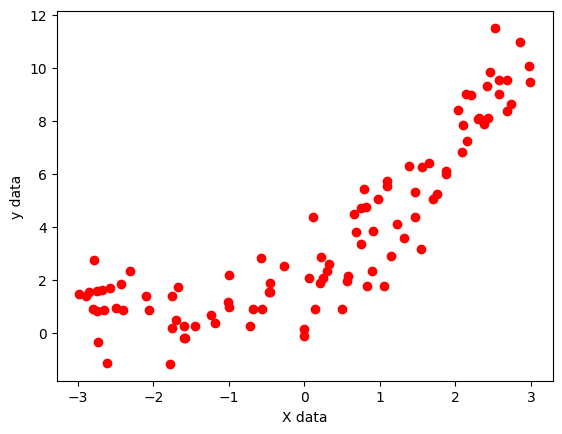

In [59]:
plt.scatter(X, y, color='r')
plt.xlabel("X data")
plt.ylabel("y data")
plt.show()

Splitting the data

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Simple Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

Our accuracy will be very low because instead of using the *Polynomial Regression*, we are using *Simple Linear Regression*

In [62]:
from sklearn.metrics import r2_score
score = r2_score(y_test, regression.predict(X_test))
score

0.5842769264917314

Let's visulize the model

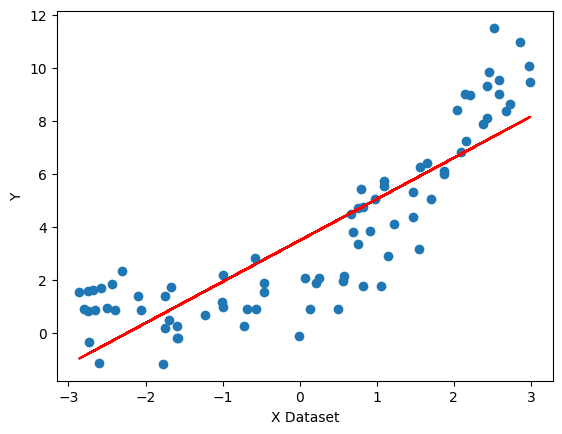

In [63]:
plt.plot(X_train, regression.predict(X_train), color='r')
plt.scatter(X_train, y_train)
plt.xlabel("X Dataset")
plt.ylabel("Y")
plt.show()

### Polynomial Regression
Let's apply polynomial tranformation

In [64]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=True)

In [65]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
X_train

array([[ 1.14628851],
       [ 2.99319875],
       [ 1.646474  ],
       [ 1.46444814],
       [-0.56307555],
       [ 2.38068568],
       [ 1.0948101 ],
       [-1.77674066],
       [ 2.04112538],
       [ 2.85450442],
       [ 2.13944823],
       [-2.43297789],
       [ 0.21297063],
       [-0.46364766],
       [ 2.45511695],
       [-2.67845658],
       [-2.3016918 ],
       [-1.75343708],
       [ 0.75387632],
       [ 1.06039895],
       [-2.60884856],
       [ 0.57634257],
       [ 0.13909966],
       [-2.8009874 ],
       [-0.00556088],
       [ 2.42525956],
       [ 1.54370985],
       [ 0.82530926],
       [-2.39515871],
       [ 0.91215345],
       [-1.59482886],
       [-1.69326658],
       [-0.99998124],
       [ 2.20728663],
       [ 0.56334754],
       [ 0.66283986],
       [ 2.68102948],
       [ 1.872651  ],
       [-2.57547305],
       [ 2.52220398],
       [ 2.08856846],
       [-2.74546253],
       [-0.72056323],
       [ 0.24938636],
       [ 0.68595999],
       [ 0

Let's compute the model accuracy

In [66]:
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)
score = r2_score(y_test, y_pred)
score

0.882160799225502

As we can see, our model accuracy has increased a lot because this time we used *Polynomial Regression*

In [67]:
print(f"Coefficient is {model.coef_}")
print(f"Intercept is {model.intercept_}")

Coefficient is [[0.         1.58559468 0.47580425]]
Intercept is [1.88020163]


We will get 3 *coefficients* because we have 3 features<br>
Let's visualize the best-fit line

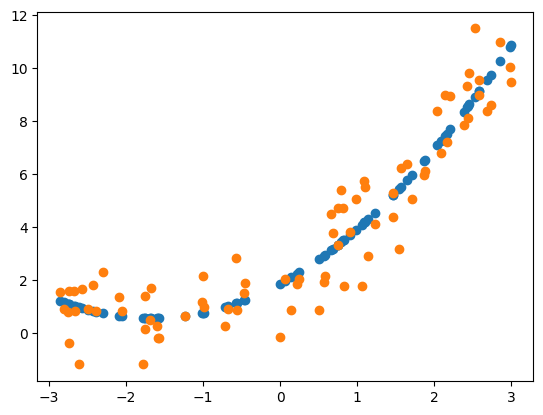

In [68]:
plt.scatter(X_train, model.predict(X_train_poly))
plt.scatter(X_train, y_train)
plt.show()

Right now, we had *degree=2*. Let's try *degree=3*

In [69]:
poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
X_train

array([[ 1.14628851],
       [ 2.99319875],
       [ 1.646474  ],
       [ 1.46444814],
       [-0.56307555],
       [ 2.38068568],
       [ 1.0948101 ],
       [-1.77674066],
       [ 2.04112538],
       [ 2.85450442],
       [ 2.13944823],
       [-2.43297789],
       [ 0.21297063],
       [-0.46364766],
       [ 2.45511695],
       [-2.67845658],
       [-2.3016918 ],
       [-1.75343708],
       [ 0.75387632],
       [ 1.06039895],
       [-2.60884856],
       [ 0.57634257],
       [ 0.13909966],
       [-2.8009874 ],
       [-0.00556088],
       [ 2.42525956],
       [ 1.54370985],
       [ 0.82530926],
       [-2.39515871],
       [ 0.91215345],
       [-1.59482886],
       [-1.69326658],
       [-0.99998124],
       [ 2.20728663],
       [ 0.56334754],
       [ 0.66283986],
       [ 2.68102948],
       [ 1.872651  ],
       [-2.57547305],
       [ 2.52220398],
       [ 2.08856846],
       [-2.74546253],
       [-0.72056323],
       [ 0.24938636],
       [ 0.68595999],
       [ 0

Now, we will compute the accuracy

In [70]:
model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)
score = r2_score(y_test, y_pred)
score

0.882160799225502

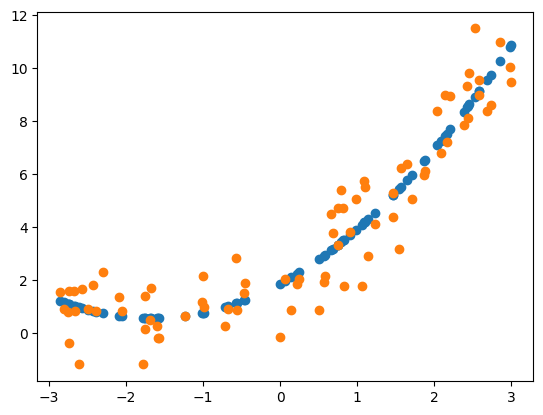

In [71]:
plt.scatter(X_train, model.predict(X_train_poly))
plt.scatter(X_train, y_train)
plt.show()

### Prediction of new dataset

In [72]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00],
       [ 1.00000000e+00, -2.63819095e+00,  6.96005151e+00],
       [ 1.00000000e+00, -2.60804020e+00,  6.80187369e+00],
       [ 1.00000000e+00, -2.57788945e+00,  6.64551400e+00],
       [ 1.00000000e+00, -2.54773869e+00,  6.49097245e+00],
       [ 1.00000000e+00, -2.51758794e+00

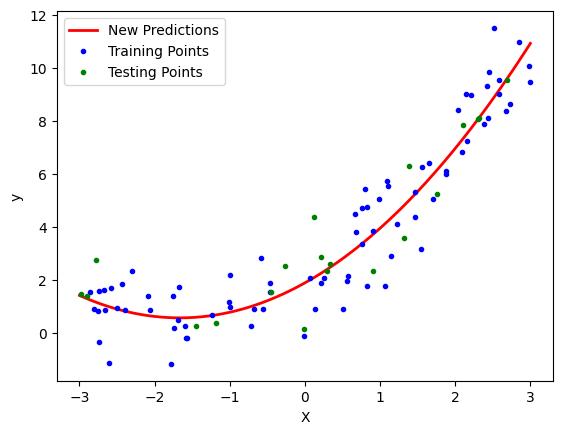

In [73]:
y_new = model.predict(X_new_poly)
plt.plot(X_new, y_new, 'r-', linewidth=2, label='New Predictions')
plt.plot(X_train, y_train, 'b.', label='Training Points')
plt.plot(X_test, y_test, 'g.', label='Testing Points')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## Pipeline Concepts

In [74]:
from sklearn.pipeline import Pipeline

In [75]:
def poly_regression(degree):
  X_new = np.linspace(-3, 3, 200).reshape(200, 1)

  poly_features = PolynomialFeatures(degree=degree, include_bias=True)
  lin_reg = LinearRegression()
  poly_regression = Pipeline([
    ('poly_features', poly_features),
    ('lin_reg', lin_reg)
  ])

  poly_regression.fit(X_train, y_train)
  y_pred_new = poly_regression.predict(X_new)

  # Plotting prediction line
  plt.plot(X_new, y_pred_new, 'r', label="Degree " + str(degree), linewidth=2)
  plt.plot(X_train, y_train, 'b.', linewidth=3)
  plt.plot(X_test, y_test, 'g.', linewidth=3)
  plt.legend(loc='upper left')
  plt.xlabel('X')
  plt.ylabel('y')
  plt.axis([-4, 4, 0, 10])
  plt.show()

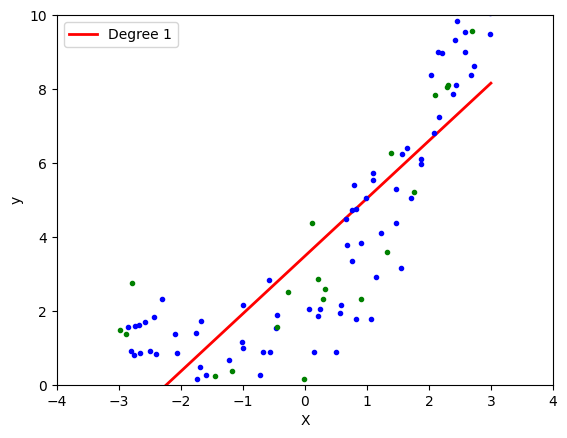

In [76]:
poly_regression(1)

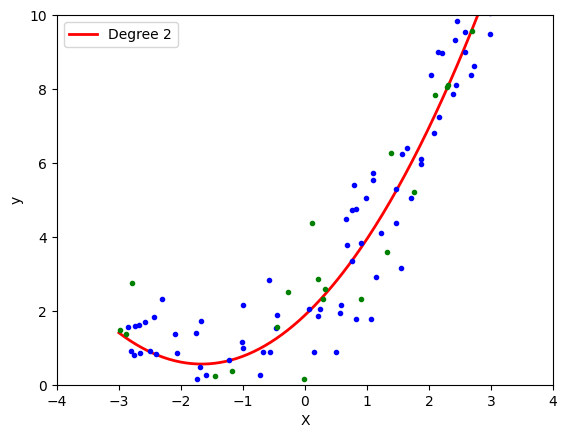

In [77]:
poly_regression(2)

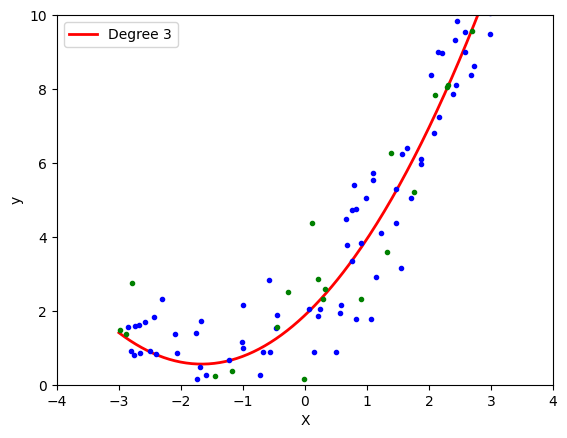

In [78]:
poly_regression(3)

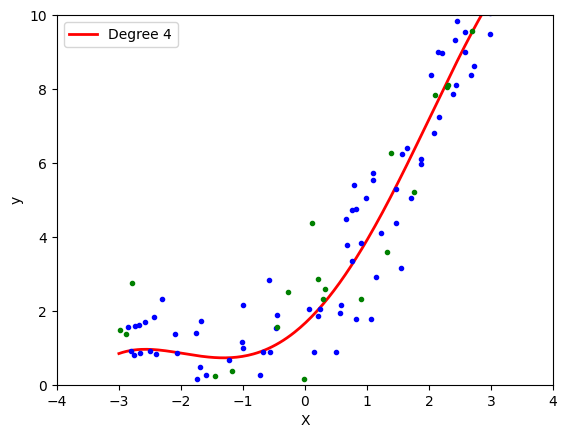

In [79]:
poly_regression(4)

As we keep on increasing the *degree*, the model will start overfitting

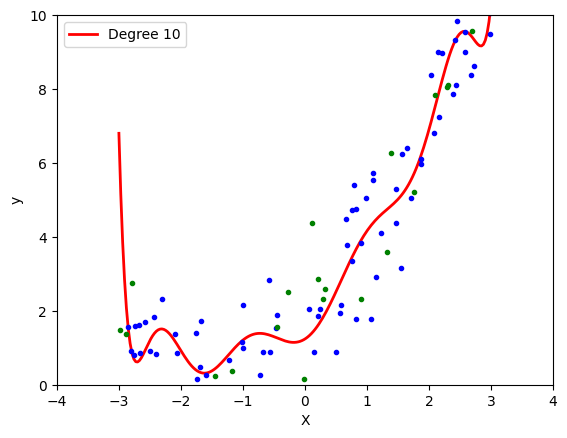

In [80]:
poly_regression(10)

*Conclusion*: We should choose the degree very wisely otherwise the model will either *Underfit* or *Overfit*